In [1]:

import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier









In [2]:

# Read data
train_data_frame = pd.read_csv("../input/titanic/train.csv")
test_data_frame = pd.read_csv("../input/titanic/test.csv")


In [3]:
train_data_frame.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_data_frame.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(train_data_frame.shape, test_data_frame.shape)

(891, 12) (418, 11)


In [6]:
significant_features = ["Sex","Age","SibSp" ,"Parch","Survived"]

In [7]:
training_data = train_data_frame[significant_features]
training_data 

,Sex,Age,SibSp,Parch,Survived
0,male,22.0,1,0,0
1,female,38.0,1,0,1
2,female,26.0,0,0,1
3,female,35.0,1,0,1
4,male,35.0,0,0,0
...,...,...,...,...,...
886,male,27.0,0,0,0
887,female,19.0,0,0,1
888,female,NaN,1,2,0
889,male,26.0,0,0,1


In [8]:
import seaborn as sns

In [9]:
sns.__version__

'0.11.2'

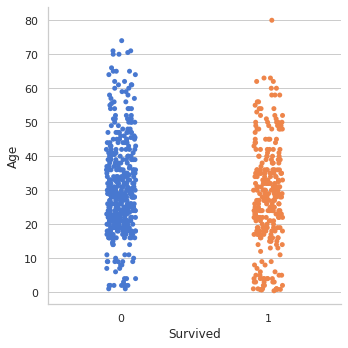

In [10]:
sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
ax = sns.catplot(data=training_data, x="Survived", y="Age", hue="Survived")
ax.set(ylabel="Age")

[Text(0, 0.5, 'Survived')]

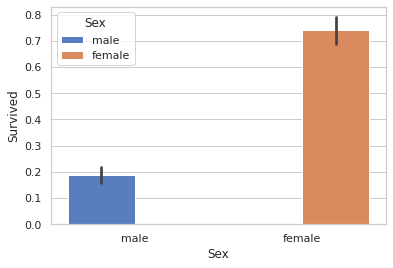

In [11]:
# Draw a categorical scatterplot to show each observation
ax = sns.barplot(data=training_data, x="Sex", y="Survived", hue="Sex")
ax.set(ylabel="Survived")

[Text(0, 0.5, 'Survived')]

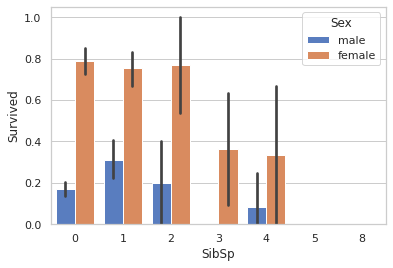

In [12]:
# sns.catplot(train_data_frame, x="SibSp", y="Survived", hue="Sex", kind="bar")
ax = sns.barplot(data=training_data, x="SibSp", y="Survived", hue="Sex")
ax.set(ylabel="Survived")

[Text(0, 0.5, 'Survived')]

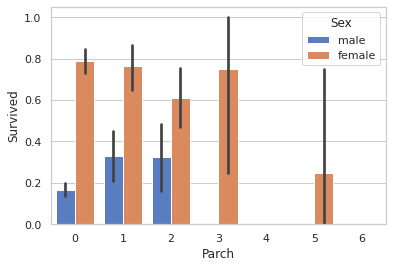

In [13]:
ax = sns.barplot(data=training_data, x="Parch", y="Survived", hue="Sex")
ax.set(ylabel="Survived")

In [14]:
print("Missing:", training_data.isnull().sum())
print("total: ", training_data.shape[0])

Missing: Sex           0
Age         177
SibSp         0
Parch         0
Survived      0
dtype: int64
total:  891


In [15]:
# Encode categorical feature 
le=LabelEncoder()
sex_encoded = le.fit_transform(training_data["Sex"])

In [16]:
training_data["Sex"] = sex_encoded

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
training_data

,Sex,Age,SibSp,Parch,Survived
0,1,22.0,1,0,0
1,0,38.0,1,0,1
2,0,26.0,0,0,1
3,0,35.0,1,0,1
4,1,35.0,0,0,0
...,...,...,...,...,...
886,1,27.0,0,0,0
887,0,19.0,0,0,1
888,0,NaN,1,2,0
889,1,26.0,0,0,1


In [18]:
# fulfil missing data 
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
training_data = imputer.fit_transform(training_data.to_numpy())
training_data = pd.DataFrame(training_data, columns=[significant_features])

In [19]:
training_data

,Sex,Age,SibSp,Parch,Survived
0,1.0,22.000000,1.0,0.0,0.0
1,0.0,38.000000,1.0,0.0,1.0
2,0.0,26.000000,0.0,0.0,1.0
3,0.0,35.000000,1.0,0.0,1.0
4,1.0,35.000000,0.0,0.0,0.0
...,...,...,...,...,...
886,1.0,27.000000,0.0,0.0,0.0
887,0.0,19.000000,0.0,0.0,1.0
888,0.0,29.699118,1.0,2.0,0.0
889,1.0,26.000000,0.0,0.0,1.0


In [20]:
# scale
sc=StandardScaler()
scaled_features = ["Age"]
scaled_data = sc.fit_transform(training_data[scaled_features].to_numpy())
scaled_data = pd.DataFrame(scaled_data, columns=[scaled_features])
training_data[scaled_features] = scaled_data
scaled_data

,Age
0,-0.592481
1,0.638789
2,-0.284663
3,0.407926
4,0.407926
...,...
886,-0.207709
887,-0.823344
888,0.000000
889,-0.284663


In [21]:
training_data

,Sex,Age,SibSp,Parch,Survived
0,1.0,-0.592481,1.0,0.0,0.0
1,0.0,0.638789,1.0,0.0,1.0
2,0.0,-0.284663,0.0,0.0,1.0
3,0.0,0.407926,1.0,0.0,1.0
4,1.0,0.407926,0.0,0.0,0.0
...,...,...,...,...,...
886,1.0,-0.207709,0.0,0.0,0.0
887,0.0,-0.823344,0.0,0.0,1.0
888,0.0,0.000000,1.0,2.0,0.0
889,1.0,-0.284663,0.0,0.0,1.0


In [22]:
# split data
# features = training_data.drop(columns=["Survived"], axis=1).to_numpy()
features = training_data[["Sex", "Age", "SibSp","Parch"]].to_numpy()

targets = training_data["Survived"].to_numpy()

In [23]:
features

array([[ 1.        , -0.5924806 ,  1.        ,  0.        ],
       [ 0.        ,  0.63878901,  1.        ,  0.        ],
       [ 0.        , -0.2846632 ,  0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  1.        ,  2.        ],
       [ 1.        , -0.2846632 ,  0.        ,  0.        ],
       [ 1.        ,  0.17706291,  0.        ,  0.        ]])

In [24]:
targets=targets.reshape(-1,)

In [25]:

# model = RandomForestClassifier(
#     n_estimators=100, max_depth=3, random_state=2)
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=2,
            oob_score=False, random_state=2, verbose=0,
            warm_start=False)
model.fit(features, targets)


RandomForestClassifier(max_depth=4, n_estimators=200, n_jobs=2, random_state=2)

In [26]:
model.feature_importances_

array([0.69562114, 0.13819579, 0.10747172, 0.05871135])

In [27]:
def pipeline(data, Target, significant_features, scale_features, encode_features, train=True):

    # Select features
    data = data[significant_features]
    
    print("Missing:\n", data.isnull().sum())
    print("total: ", data.shape[0])
    
    X, y = None, None

    if train :
        # Slect Features and Target from data frame
        X = data.drop(axis=1, columns=Target).to_numpy()
        y = data[Target].to_numpy()
        significant_features.pop(significant_features.index(Target))

    else:
        X = data
    
    X_features = significant_features

    # encode Categorical feature
    le=LabelEncoder()
    
    encoded = le.fit_transform(X[encode_features])
    X[encode_features] = encoded


    # fulfil missing data 
    imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
    X = imputer.fit_transform(X.to_numpy())
    X = pd.DataFrame(X, columns=[X_features])

    # scale
    sc=StandardScaler()
    scaled_features = scale_features
    scaled_data = sc.fit_transform(X[scaled_features].to_numpy())
    scaled_data = pd.DataFrame(scaled_data, columns=[scaled_features])
    X[scaled_features] = scaled_data  
    
    if y != None:
        y.reshape(-1, )
        
    return X, y

In [28]:
X_pred, _ = pipeline(test_data_frame, Target="", 
                significant_features= ["Sex", "Age", "SibSp","Parch"], 
                scale_features=["Age"], 
                encode_features="Sex", train=False)

Missing:
 Sex       0
Age      86
SibSp     0
Parch     0
dtype: int64
total:  418


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [29]:
X_pred

,Sex,Age,SibSp,Parch
0,1.0,0.334993,0.0,0.0
1,0.0,1.325530,1.0,0.0
2,1.0,2.514175,0.0,0.0
3,1.0,-0.259330,0.0,0.0
4,0.0,-0.655545,1.0,1.0
...,...,...,...,...
413,1.0,0.000000,0.0,0.0
414,0.0,0.691586,0.0,0.0
415,1.0,0.651965,0.0,0.0
416,1.0,0.000000,0.0,0.0


In [30]:
output = model.predict(X_pred)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [31]:
output = output.astype("int64")
output

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [32]:
PassengerId = np.array(test_data_frame["PassengerId"])
PassengerId


array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

In [33]:
df = pd.DataFrame({"PassengerId": PassengerId,"Survived": output})
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [34]:
df.to_csv('submission.csv', index=False)